# Part1

## 城市地理数据

In [1]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

### 使用正则表达式获得数据

In [2]:
import re

In [3]:
l = "color or colour"

In [5]:
pattern = re.compile("colou?r")  #使用正则表达式提取数据
pattern.findall(l)

['color', 'colour']

In [6]:
# 提取城市名及地理坐标
def get_city_info(city_coordination):
    city_location = {}
    for line in city_coordination.split('\n'):
        if line.startswith('//'):continue
        if line.strip() == "":continue
            
        city = re.findall("name:'(\w+)'",line)[0]
        x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
        x_y = tuple(map(float,x_y))
        city_location[city] = x_y
    return city_location

In [7]:
city_info = get_city_info(coordination_source)

In [8]:
city_info

{'上海': (121.48, 31.22),
 '乌鲁木齐': (87.68, 43.77),
 '兰州': (103.73, 36.03),
 '北京': (116.46, 39.92),
 '南京': (118.78, 32.04),
 '南宁': (108.33, 22.84),
 '南昌': (115.89, 28.68),
 '合肥': (117.27, 31.86),
 '呼和浩特': (111.65, 40.82),
 '哈尔滨': (126.63, 45.75),
 '嘉峪关': (98.17, 39.47),
 '天津': (117.2, 39.13),
 '太原': (112.53, 37.87),
 '广州': (113.23, 23.16),
 '成都': (104.06, 30.67),
 '拉萨': (102.73, 25.04),
 '杭州': (120.19, 30.26),
 '武汉': (114.31, 30.52),
 '沈阳': (123.38, 41.8),
 '济南': (117.0, 36.65),
 '澳门': (113.54, 22.19),
 '石家庄': (114.48, 38.03),
 '福州': (119.3, 26.08),
 '西宁': (101.74, 36.56),
 '西安': (108.95, 34.27),
 '贵阳': (106.71, 26.57),
 '郑州': (113.65, 34.76),
 '重庆': (106.54, 29.59),
 '银川': (106.27, 38.47),
 '长春': (125.35, 43.88),
 '长沙': (113.0, 28.21),
 '香港': (114.17, 22.28)}

### 通过经纬度计算距离

In [9]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [11]:
def get_city_distance(city1,city2):
    return geo_distance(city_info[city1],city_info[city2])

In [12]:
get_city_distance("上海","北京")

727.52769688981

## Draw the graph

In [24]:
# 导入绘制地图的库
import networkx as nx
import matplotlib.pyplot as plt
# 解决中文字体显示问题
# %matplotlib inline
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False

In [18]:
city_info.keys()

dict_keys(['兰州', '嘉峪关', '西宁', '成都', '石家庄', '拉萨', '贵阳', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '沈阳', '长春', '哈尔滨', '太原', '西安', '北京', '上海', '重庆', '天津', '呼和浩特', '南宁', '银川', '乌鲁木齐', '香港', '澳门'])

In [19]:
city_info.values()

dict_values([(103.73, 36.03), (98.17, 39.47), (101.74, 36.56), (104.06, 30.67), (114.48, 38.03), (102.73, 25.04), (106.71, 26.57), (114.31, 30.52), (113.65, 34.76), (117.0, 36.65), (118.78, 32.04), (117.27, 31.86), (120.19, 30.26), (115.89, 28.68), (119.3, 26.08), (113.23, 23.16), (113.0, 28.21), (123.38, 41.8), (125.35, 43.88), (126.63, 45.75), (112.53, 37.87), (108.95, 34.27), (116.46, 39.92), (121.48, 31.22), (106.54, 29.59), (117.2, 39.13), (111.65, 40.82), (108.33, 22.84), (106.27, 38.47), (87.68, 43.77), (114.17, 22.28), (113.54, 22.19)])

In [20]:
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_info.keys()))

F:\Editor\Anaconda3\envs\tf-gpu\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
F:\Editor\Anaconda3\envs\tf-gpu\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
F:\Editor\Anaconda3\envs\tf-gpu\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
F:\Editor\Anaconda3\envs\tf-gpu\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or

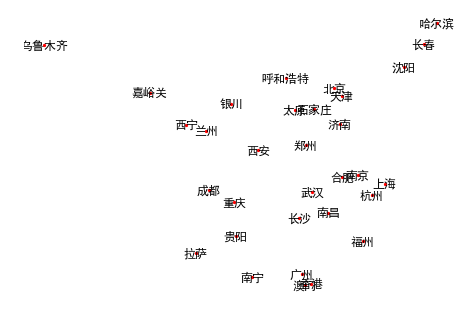

In [26]:
nx.draw(city_graph, city_info, with_labels=True, node_size=5)

In [27]:
# 假设两城市之间的距离是700，就是可以相连起来的
threshold = 700 

In [29]:
from collections import defaultdict

In [34]:
def build_conection(city_info):
    cities_connection = defaultdict(list)
    cities = list(city_info.keys())
    
    for c1 in cities:
        for c2 in cities:
            if c1 == c2:continue
            if get_city_distance(c1,c2) < threshold:
                cities_connection[c1].append(c2)
    return cities_connection

In [35]:
cities_connection = build_conection(city_info)

In [36]:
cities_connection

defaultdict(list,
            {'上海': ['济南', '南京', '合肥', '杭州', '南昌', '福州', '沈阳', '天津'],
             '兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '北京': ['石家庄',
              '武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '长沙',
              '太原',
              '天津',
              '呼和浩特'],
             '南京': ['石家庄',
              '武汉',
              '郑州',
              '济南',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '长沙',
              '北京',
              '上海',
              '天津'],
             '南宁': ['兰州',
              '成都',
              '拉萨',
              '贵阳',
              '广州',
              '长沙',
              '西安',
              '重庆',
              '银川',
              '香港',
              '澳门'],
             '南昌': ['石家庄',
              '武汉',
              '郑州',
              '济南',
              '南京',
     

### 画出两城市之间距离小于700的图

In [37]:
cities_connection_graph = nx.Graph(cities_connection)

F:\Editor\Anaconda3\envs\tf-gpu\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
F:\Editor\Anaconda3\envs\tf-gpu\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
F:\Editor\Anaconda3\envs\tf-gpu\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
F:\Editor\Anaconda3\envs\tf-gpu\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
F:\Editor\Anaconda3\envs\tf-gpu\lib\

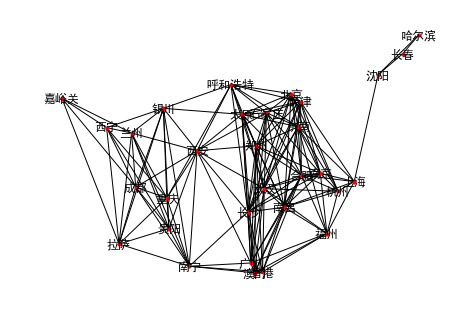

In [38]:
nx.draw(cities_connection_graph,city_info,with_labels=True,node_size=10)

### BFS 1.0 version for 最少转乘数

In [39]:
def bfs(graph, start, destination):
    pathes = [[start]]  #建立list pathes 维护搜索路径
    visited = set()
    
    while pathes:
        path = pathes.pop(0)   #拿出第一条路径
#         检查该路径与那个节点相连
        froniter = path[-1]
        
        if froniter in visited: continue
            
        successors = graph[froniter]
        
        for city in successors:
            if city in path: continue  #检查是否是环
                
            new_path = path + [city]   #新拓展的路径
            
            pathes.append(new_path)    #将新拓展的路径放入list中
#             检查最后的city是否为终结点，如果是就返回路径
            if city == destination:     
                return new_path   # 当一条路的重点是G的时候我们就返回
        visited.add(froniter)

In [40]:
bfs(cities_connection,"上海","香港")

['上海', '合肥', '香港']

In [41]:
bfs(cities_connection,"拉萨","西安")

['拉萨', '兰州', '西安']

### DFS 1.0 version 

In [42]:
 def dfs(graph, start, destination):
    pathes = [[start]]  #建立list pathes 维护搜索路径
    visited = set()
    
    while pathes:
        path = pathes.pop(0)   #拿出第一条路径
#         检查该路径与那个节点相连
        froniter = path[-1]
        
        if froniter in visited: continue
            
        successors = graph[froniter]
        
        for city in successors:
            if city in path: continue  #检查是否是环
                
            new_path = path + [city]   #新拓展的路径
            
            pathes = [new_path] + pathes  #将新拓展的路径放至list前
            
#             pathes.append(new_path)    #将新拓展的路径放入list中
#             检查最后的city是否为终结点，如果是就返回路径
            if city == destination:     
                return new_path
        visited.add(froniter)

In [43]:
dfs(cities_connection,"上海","香港")

['上海', '天津', '呼和浩特', '银川', '南宁', '香港']

In [44]:
dfs(cities_connection,"拉萨","西安")

['拉萨', '银川', '西安']

In [45]:
dfs(cities_connection,"拉萨","北京")

['拉萨', '银川', '南宁', '澳门', '香港', '长沙', '北京']

In [46]:
bfs(cities_connection,"拉萨","北京")

['拉萨', '重庆', '呼和浩特', '北京']

### BFS 2.0 version for 最短里程数

In [74]:
def bfs_2(graph,start,destination,search_strategy):
    pathes = [[start]]
    
    while pathes:
        path = pathes.pop(0)   #path = 
        froniter = path[-1]
        
        successsors = graph[froniter]
        
        for city in successsors:
            if city in path : continue
                
            new_path = path + [city]
            
            pathes.append(new_path)
                
        pathes = search_strategy(pathes)
        
        if pathes and (destination == pathes[0][-1]):  # 这条路经过重排后是最短的，并且最后一个点是终点
            return pathes[0]

In [75]:
def sort_by_distance(pathes):
    def get_distance_of_path(path):
        distance = 0 
        for i,_ in enumerate(path[:-1]):
            distance += get_city_distance(path[i],path[i+1])
        return distance
    return sorted(pathes,key=get_distance_of_path)

In [62]:
def get_distance_of_path(path):
        distance = 0 
        for i,_ in enumerate(path[:-1]):
            distance += get_city_distance(path[i],path[i+1])
        return distance

In [50]:
get_distance_of_path(["北京","济南","上海"])

752.66259009181

In [51]:
get_distance_of_path(["北京","天津","上海"])

732.5085345714293

In [76]:
bfs_2(cities_connection,"北京","上海",search_strategy = sort_by_distance)

['北京', '天津', '上海']

In [66]:
bfs(cities_connection,"北京","上海")

['北京', '济南', '上海']

In [70]:
get_distance_of_path(["北京","济南","上海"])

752.66259009181

# Part2

## Machine Learning

In [77]:
from sklearn.datasets import load_boston
import random

F:\Editor\Anaconda3\envs\tf-gpu\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
F:\Editor\Anaconda3\envs\tf-gpu\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [78]:
dataset = load_boston()

In [79]:
# dataset

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [80]:
x,y=dataset['data'],dataset['target']

In [81]:
x.shape

(506, 13)

In [82]:
y.shape

(506,)

In [83]:
x[1].shape
x[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [84]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [85]:
dataset['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [86]:
X_rm = x[:,5]

In [88]:
X_rm.shape

(506,)

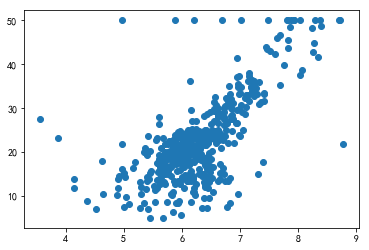

In [87]:
# plot the RM with respect to y
plt.scatter(X_rm,y)

### Gradient descent

### Assume that the target funciton is a linear function
$$ y = k*rm + b$$

In [89]:
#define target function
def price(rm, k, b):
    return k * rm + b 

### Define mean square loss
$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$
$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$

In [90]:
# define loss function 
def loss(y,y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

### Define partial derivatives
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$


$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

In [92]:
# define partial derivative 
def partial_derivative_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) * x_i
    return -2/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i-y_hat_i)
    return -2 / n * gradient

In [97]:
#initialized parameters

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 200 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 18061.73186835296, parameters k is 19.232638819866594 and b is 35.705857177510865
Iteration 1, the loss is 15238.137907507544, parameters k is 17.537831860892005 and b is 35.43777086923036
Iteration 2, the loss is 12858.391736306314, parameters k is 15.981942922010541 and b is 35.19152321775501
Iteration 3, the loss is 10852.723745779935, parameters k is 14.55358703167888 and b is 34.965324447839
Iteration 4, the loss is 9162.331596484131, parameters k is 13.242312269165005 and b is 34.75753146455433
Iteration 5, the loss is 7737.656244371012, parameters k is 12.038523296740332 and b is 34.566635832163755
Iteration 6, the loss is 6536.928962717175, parameters k is 10.93341115876062 and b is 34.39125273818039
Iteration 7, the loss is 5524.9467615213225, parameters k is 9.918888834035245 and b is 34.23011086187345
Iteration 8, the loss is 4672.040301968324, parameters k is 8.987532069976405 and b is 34.08204307309653
Iteration 9, the loss is 3953.204047150852, pa

Iteration 196, the loss is 98.59417314292595, parameters k is -1.4006632986820045 and b is 32.13876022234262
Iteration 197, the loss is 98.59152828659666, parameters k is -1.4004108253535734 and b is 32.137153628010154
Iteration 198, the loss is 98.58888355747003, parameters k is -1.400158350784932 and b is 32.135547073461225
Iteration 199, the loss is 98.58623895553976, parameters k is -1.3999058755753206 and b is 32.133940558600685


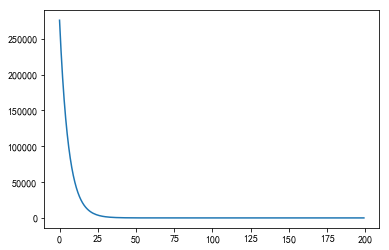

In [94]:
plt.plot(list(range(iteration_num)),losses)

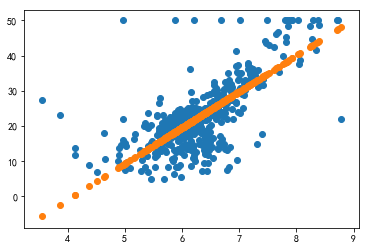

In [95]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)